In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # For statistical tests
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df1 = pd.read_csv(r"../datasets/weather_classification_data.csv")
# Preprocess the data
df = pd.read_csv(r"../datasets/processed_weather_data.csv")



### Machine learning 

* ML model selection
    - At this point of the project, I'll start the process to perform the __Multiple Linear Regression__ to practice and consolidate the knowledge acquired during the classes.

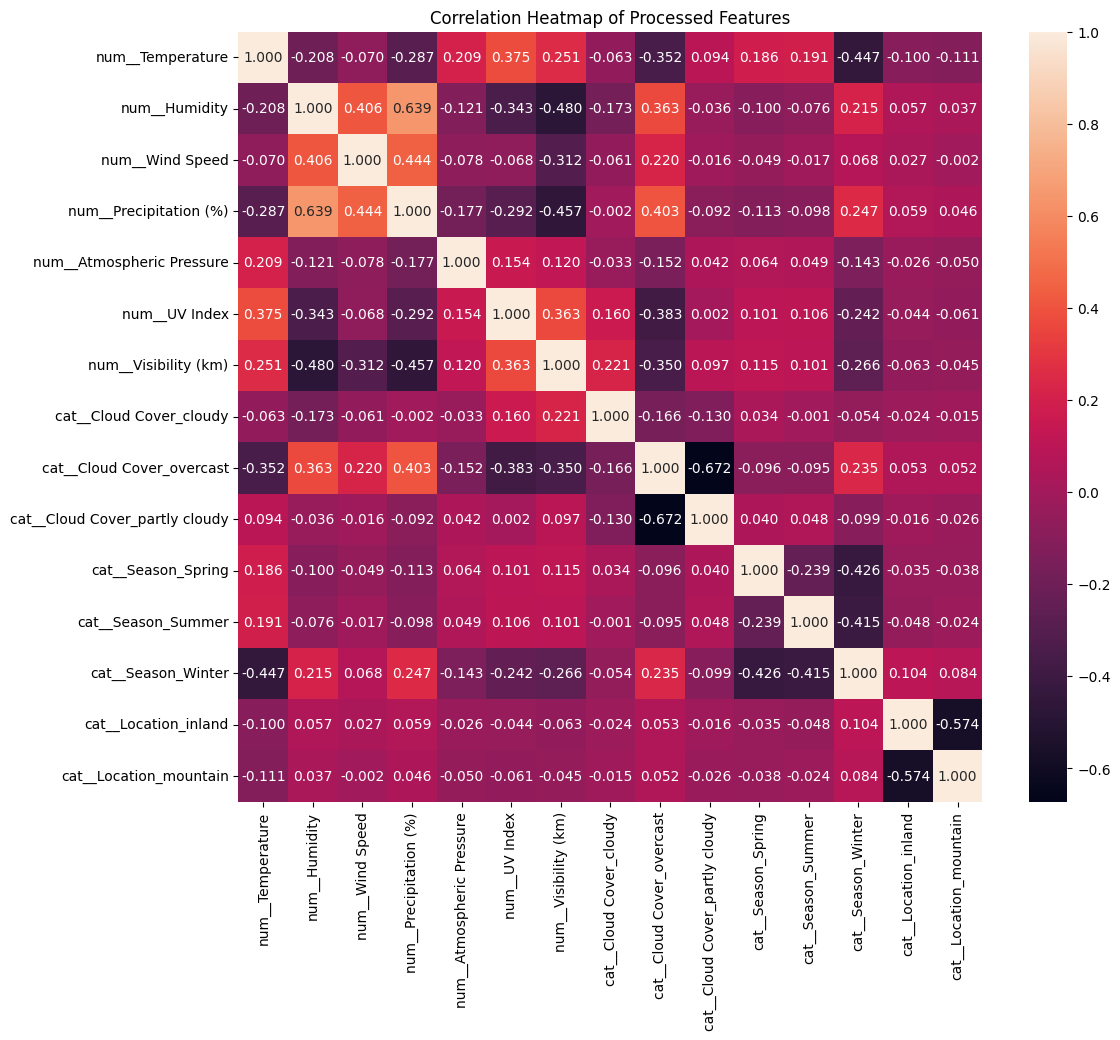

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Heatmap of Processed Features")
plt.show()
#Check for multicollinearity using VIF
#Create a dataframe which has column names and associated VIF value for each column.


In [17]:
df.head()


,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
df1.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [19]:
x = df

In [20]:
def define_dryness_for_wildfire(row):
    if row["Precipitation (%)"] < df1["Precipitation (%)"].quantile(0.10) and row["Humidity"] < 50 and row["Temperature"] > 25:
        return "Dry"
    else:
        return "Not Dry"

df1["Dryness"] = df1.apply(define_dryness_for_wildfire, axis=1)
print("\nValue counts for Dryness:")
print(df1["Dryness"].value_counts())

# Target variable for classification (1 for Dry, 0 for Not Dry)
y = df1["Dryness"].apply(lambda x: 1 if x == "Dry" else 0)

# Features for classification
features = ["Temperature", "Humidity", "Precipitation (%)"]

X = df
# Split the data into training and testing sets



Value counts for Dryness:
Dryness
Not Dry    12618
Dry          582
Name: count, dtype: int64


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Dryness, dtype: int64

In [22]:
X.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Machine learning 

* ML model selection
    - At this point of the project, I'll start the process to perform the __Multiple Linear Regression__ to practice and consolidate the knowledge acquired during the classes.

Correlation heatmap

In [23]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(x_processed_df.corr(), annot=True, fmt=".3f")
# plt.title("Correlation Heatmap of Processed Features")
# plt.show()
# #Check for multicollinearity using VIF
# #Create a dataframe which has column names and associated VIF value for each column.


In [24]:
#Check for multicollinearity using VIF
#Create a dataframe which has column names and associated VIF value for each column.
vif_df = pd.DataFrame({'Variable': x.columns, 
                       'VIF' : [vif(x.values, i) for i in range(x.shape[1])]
                      })

vif_df

,Variable,VIF
0,num__Temperature,1.440491
1,num__Humidity,1.973567
2,num__Wind Speed,1.345921
3,num__Precipitation (%),2.072371
4,num__Atmospheric Pressure,1.069968
5,num__UV Index,1.461451
6,num__Visibility (km),1.554803
7,cat__Cloud Cover_cloudy,1.202969
8,cat__Cloud Cover_overcast,3.571049
9,cat__Cloud Cover_partly cloudy,2.274937


Because any of the VIF variable values are greater than 5 __THERE IS NO MULTICOLINEARITY__ between the predictables on the dataset.  

#### TRAINING & TEST SPLIT 

In [25]:
X_40 = x.copy()
Y_40 = y.copy()

## __60/40__

In [26]:
#Split the data
x_40_train, x_40_test, Y_40_train, Y_40_test = train_test_split(x, y, test_size=0.4, random_state = 42)

In [27]:
x_40_train.shape

(7920, 15)

In [28]:
x_40_test.shape

(5280, 15)

In [29]:
#Multiple Linear Regression
lr_40 = LinearRegression() #Model Building
lr_40.fit(x_40_train, Y_40_train) #Model Training

LinearRegression()

In [30]:
Y_40_pred = lr_40.predict(x_40_test)
Y_40_pred

array([ 0.21817213,  0.08259021,  0.12042167, ...,  0.27634476,
       -0.08130948,  0.07790018], shape=(5280,))

In [31]:
#Find the line slope
lr_40.coef_

array([ 0.0152392 , -0.05399267,  0.00549931, -0.02781235, -0.00124659,
        0.01574434, -0.01904162, -0.14369124, -0.07605569, -0.0721872 ,
        0.00085014,  0.00121775,  0.0267047 ,  0.00785835,  0.00143583])

In [32]:
#FInd the line intercept
lr_40.intercept_

np.float64(0.09332104687341958)

In [33]:
#Predict data
Y_40_pred = lr_40.predict(x_40_test)
Y_40_pred

array([ 0.21817213,  0.08259021,  0.12042167, ...,  0.27634476,
       -0.08130948,  0.07790018], shape=(5280,))

In [34]:
Y_40_test.head()

4111     0
10607    0
7372     0
11786    0
12227    0
Name: Dryness, dtype: int64

In [35]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_40_pred, 'Actual Value': Y_40_test})
results_diff

,Predicted Value,Actual Value
4111,0.218172,0
10607,0.082590,0
7372,0.120422,0
11786,-0.026449,0
12227,-0.082773,0
...,...,...
1322,0.122799,0
1603,-0.012620,0
4210,0.276345,1
10283,-0.081309,0


In [36]:
results_diff['Actual Value'].unique()

array([0, 1])

In [37]:
# #Plot the histogram for the error/cost function
# fig = plt.figure()
# sns.histplot(Y_40_test - Y_40_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize = 15)
# plt.show()

In [38]:
#Compute the metrics
mae = mean_absolute_error(Y_40_test, Y_40_pred)
mse = mean_squared_error(Y_40_test, Y_40_pred)
r2 = r2_score(Y_40_test, Y_40_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  0.09495793686517572
Mean Squared Error:  0.033447631074570376
R2 coefficient:  0.19046613626242948


---

## __90/10__

In [39]:
X_10 = x.copy()
Y_10 = y.copy()

In [40]:
#Split the data
x_10_train, x_10_test, Y_10_train, Y_10_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [41]:
#Multiple Linear Regression
lr_10 = LinearRegression() #Model Building
lr_10.fit(x_10_train, Y_10_train) #Model Training

LinearRegression()

In [42]:
#Find the line slope
lr_10.coef_

array([ 1.62838621e-02, -5.47542803e-02,  5.71156214e-03, -2.69188539e-02,
       -6.64869611e-05,  1.49045395e-02, -1.83789784e-02, -1.40005509e-01,
       -7.48360193e-02, -7.18769389e-02, -9.57311088e-04,  1.33328740e-03,
        2.64980329e-02,  1.20116220e-02,  7.80793184e-03])

In [43]:
#FInd the line intercept
lr_10.intercept_

np.float64(0.0893826749287947)

In [44]:
#Predict data
Y_10_pred = lr_10.predict(x_10_test)
Y_10_pred

array([ 0.21857313,  0.08454086,  0.12211681, ...,  0.02673957,
       -0.03453805,  0.22624601], shape=(1320,))

In [45]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_10_pred, 'Actual Value': Y_10_test})
results_diff

,Predicted Value,Actual Value
4111,0.218573,0
10607,0.084541,0
7372,0.122117,0
11786,-0.026560,0
12227,-0.081258,0
...,...,...
12119,0.055245,0
424,0.021745,0
554,0.026740,0
944,-0.034538,0


In [46]:
# #Plot the histogram for the error/cost function
# fig = plt.figure()
# sns.histplot(Y_10_test - Y_10_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize = 15)
# plt.show()

In [47]:
#Compute the metrics
mae = mean_absolute_error(Y_10_test, Y_10_pred)
mse = mean_squared_error(Y_10_test, Y_10_pred)
r2 = r2_score(Y_10_test, Y_10_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  0.09445575602922585
Mean Squared Error:  0.032540916204205336
R2 coefficient:  0.18506227245120577


SIMPLE LINEAR REGRESSION: Making the simpler model possible to check if there is any problem on the Multiple Linear regression model performed above.

To do this test is necessary to select the most correlated features between the dataset, then it will be the most important predictable variable.

In [48]:
df.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
# x_processed_df.to_csv("processed_weather_data.csv", index=False)

In [50]:
x.shape

(13200, 15)

In [51]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [52]:
#Find the best fit line in Simple linear regression
lr = LinearRegression()
lr.fit(x_train, Y_train)

LinearRegression()

In [53]:
#Predict data
Y_pred = lr.predict(x_test)
Y_pred

#Find the line slope
lr.coef_

#FInd the line intercept
lr.intercept_

np.float64(0.09306807674952994)

In [54]:
# plt.scatter(x_train, Y_train)
# plt.show()

In [55]:
# #Plot the best fit line for training data
# plt.scatter(x_train, Y_train)
# plt.plot(x_train, 0.055*x_train + 7.007, 'g')
# plt.title('Best fit line for training data')
# plt.show()

In [56]:
# #Plot the best fit line for test data
# plt.scatter(x_test, Y_test)
# plt.plot(x_test, 0.055*x_test + 7.007, 'g')
# plt.title('Best fit line for test data')
# plt.show()

In [57]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_pred, 'Actual Value': Y_test})
results_diff

,Predicted Value,Actual Value
1092,0.269589,0
10991,0.025728,0
6597,0.010606,0
4164,-0.075402,0
445,-0.006586,0
...,...,...
4356,0.011878,0
4514,-0.051153,0
9376,0.086599,0
1797,0.143767,0


In [58]:
# #Plot the histogram for the error/cost function
# fig = plt.figure()
# sns.histplot(Y_test - Y_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize = 15)
# plt.show()

In [59]:
#Compute the metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  0.09687637622968427
Mean Squared Error:  0.03616143958405481
R2 coefficient:  0.19216764537595377


### Conclusion:

Out of 60/40 and 90/10 split, 90/10 split is slightly considered a best model, but because the both results are with low percentage the model isn't efficient to predict the Dryness weather conditions.

Another Strategy to try to improve that model is play around with the columns and find a best way to follow the direction to make the model works for what is was made for. 

### 60/40 Split
* Mean Absolute Error:  0.09823481987365398
* Mean Squared Error:  0.037938878941927455
* R2 coefficient:  0.12905458362973743


### 90/10 Split Results

* Mean Absolute Error:  0.09870580611047627
* Mean Squared Error:  0.03879481718476343
* R2 coefficient:  0.13333902427391386

## __Assignment: Second part__


BASED ON THIS DATAFRAME, I'LL SELECT THE FEATURES USED TO SET THE PURPOSE OF MY PROJECT, WHICH IS PREDICT VALUES THAT WILL REPRESENT A DRY WEATHER.

THE FEATURES ARE:

* TEMPERATURE
* HUMIDITY
* PRECIPITATION

IN ADDICTION TO IT I'LL ALSO DROP THE FEATURE WITH THE HIGHEST CORRELATION REPRESENTED ON THE VIF COLUMN, WHICH IS:
* CLOUD COVER OVERCAST (clouds covering 95% of the sky) (high humidity)

Visualizing features

In [60]:
d_1 = pd.DataFrame({'Feature': df.columns, 'VIF': [vif(df.values, i) for i in range(df.shape[1])]})
d_1

,Feature,VIF
0,num__Temperature,1.440491
1,num__Humidity,1.973567
2,num__Wind Speed,1.345921
3,num__Precipitation (%),2.072371
4,num__Atmospheric Pressure,1.069968
5,num__UV Index,1.461451
6,num__Visibility (km),1.554803
7,cat__Cloud Cover_cloudy,1.202969
8,cat__Cloud Cover_overcast,3.571049
9,cat__Cloud Cover_partly cloudy,2.274937


## __Dropping features__

- 1 - __TEMPERATURE__

In [61]:
x1 = df.drop(["num__Temperature"], axis=1)

In [62]:
x1.shape

(13200, 14)

In [63]:
x1# Split the data again with the reduced feature set
x1_train, x1_test, Y1_train, Y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Multiple Linear Regression with reduced features
lr1 = LinearRegression()  # Model Building
lr1.fit(x1_train, Y1_train)  # Model Training


# Display the intercept of the model
print(f"Intercept / bias: {lr1.intercept_:.4f}")

# Predict data
Y1_pred = lr1.predict(x1_test)

# Compute the metrics
mae1 = mean_absolute_error(Y1_test, Y1_pred)
mse1 = mean_squared_error(Y1_test, Y1_pred)
r2_1 = r2_score(Y1_test, Y1_pred)
print('Mean Absolute Error: ', mae1)
print('Mean Squared Error: ', mse1)
print('R2 coefficient: ', r2_1)



Intercept / bias: 0.1090
Mean Absolute Error:  0.09188210626071544
Mean Squared Error:  0.031807367355993245
R2 coefficient:  0.17467860670604118


In [64]:
# Dataframe for predicted and actual values
results_diff1 = pd.DataFrame({'Predicted Value': Y1_pred, 'Actual Value': Y1_test})
results_diff1

,Predicted Value,Actual Value
4111,0.232372,0
10607,0.059736,0
7372,0.108692,0
11786,-0.016788,0
12227,-0.076388,0
...,...,...
2543,0.019419,0
96,-0.033334,0
2474,-0.070214,0
2522,-0.059520,0


In [65]:
# # Plot the histogram for the error/cost function
# fig1 = plt.figure()
# sns.histplot(Y1_test - Y1_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize=15)
# plt.show()

- 2 - __HUMIDITY__

In [66]:
x2 = df.drop(["num__Humidity"], axis=1)


In [67]:
x2.shape

(13200, 14)

In [68]:
# Split the data again with the reduced feature set
x2
x2_train, x2_test, Y2_train, Y2_test = train_test_split(x2, y, test_size=0.2, random_state=42)

# Multiple Linear Regression with reduced features
lr2 = LinearRegression()  # Model Building
lr2.fit(x2_train, Y2_train)  # Model Training

# Display the intercept of the model
print(f"Intercept / bias: {lr2.intercept_:.4f}")

# Predict data
Y2_pred = lr2.predict(x2_test)

# Compute the metrics
mae2 = mean_absolute_error(Y2_test, Y2_pred)
mse2 = mean_squared_error(Y2_test, Y2_pred)
r2_2 = r2_score(Y2_test, Y2_pred)
print('Mean Absolute Error: ', mae2)
print('Mean Squared Error: ', mse2)
print('R2 coefficient: ', r2_2)


Intercept / bias: 0.1050
Mean Absolute Error:  0.08916727167270595
Mean Squared Error:  0.03291739071690444
R2 coefficient:  0.1458762850123706


In [69]:
# Dataframe for predicted and actual values
results_diff2 = pd.DataFrame({'Predicted Value': Y2_pred, 'Actual Value': Y2_test})
results_diff2

,Predicted Value,Actual Value
4111,0.206673,0
10607,0.131075,0
7372,0.121302,0
11786,-0.042359,0
12227,-0.041218,0
...,...,...
2543,0.002119,0
96,0.011864,0
2474,-0.051023,0
2522,-0.031862,0


In [70]:
# # Plot the histogram for the error/cost function
# fig2 = plt.figure()
# sns.histplot(Y2_test - Y2_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize=15)
# plt.show()

- 3 - __PRECIPITATION__

In [71]:
x3 = df.drop(["num__Precipitation (%)"], axis=1)
x3.shape

(13200, 14)

In [72]:
x3
x3_train, x3_test, Y3_train, Y3_test = train_test_split(x3, y, test_size=0.2, random_state=42)
# Multiple Linear Regression with reduced features
lr3 = LinearRegression()  # Model Building
lr3.fit(x3_train, Y3_train)  # Model Training
# Display the intercept of the model
print(f"Intercept / bias: {lr3.intercept_:.4f}")
# Predict data
Y3_pred = lr3.predict(x3_test)
# Compute the metrics
mae3 = mean_absolute_error(Y3_test, Y3_pred)
mse3 = mean_squared_error(Y3_test, Y3_pred)
r2_3 = r2_score(Y3_test, Y3_pred)
print('Mean Absolute Error: ', mae3)
print('Mean Squared Error: ', mse3)
print('R2 coefficient: ', r2_3)

Intercept / bias: 0.1050
Mean Absolute Error:  0.09257029737999029
Mean Squared Error:  0.0319680394562778
R2 coefficient:  0.1705095687537277


In [73]:
# Dataframe for predicted and actual values
results_diff3 = pd.DataFrame({'Predicted Value': Y3_pred, 'Actual Value': Y3_test})
results_diff3

,Predicted Value,Actual Value
4111,0.217254,0
10607,0.100830,0
7372,0.107510,0
11786,-0.010128,0
12227,-0.045538,0
...,...,...
2543,0.041826,0
96,-0.026549,0
2474,-0.064726,0
2522,-0.062114,0


In [74]:
# # Plot the histogram for the error/cost function
# fig3 = plt.figure()
# sns.histplot(Y3_test - Y3_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize=15)
# plt.show()

* 4 - __CLOUD COVER OVERCAST__

In [75]:
x4 = df.drop(["num__Precipitation (%)"], axis=1)
x4.shape


(13200, 14)

In [76]:
# Split the data again with the reduced feature set
x4_train, x4_test, Y4_train, Y4_test = train_test_split(x4, y, test_size=0.2, random_state=42)
# Multiple Linear Regression with reduced features
lr4 = LinearRegression()  # Model Building
lr4.fit(x4_train, Y4_train)  # Model Training
# Display the intercept of the model
print(f"Intercept / bias: {lr4.intercept_:.4f}")
# Predict data
Y4_pred = lr4.predict(x4_test)
# Compute the metrics
mae4 = mean_absolute_error(Y4_test, Y4_pred)
mse4 = mean_squared_error(Y4_test, Y4_pred)
r2_4 = r2_score(Y4_test, Y4_pred)
print('Mean Absolute Error: ', mae4)
print('Mean Squared Error: ', mse4)
print('R2 coefficient: ', r2_4)

Intercept / bias: 0.1050
Mean Absolute Error:  0.09257029737999029
Mean Squared Error:  0.0319680394562778
R2 coefficient:  0.1705095687537277


In [77]:
# Dataframe for predicted and actual values
results_diff4 = pd.DataFrame({'Predicted Value': Y4_pred, 'Actual Value': Y4_test})
results_diff4

,Predicted Value,Actual Value
4111,0.217254,0
10607,0.100830,0
7372,0.107510,0
11786,-0.010128,0
12227,-0.045538,0
...,...,...
2543,0.041826,0
96,-0.026549,0
2474,-0.064726,0
2522,-0.062114,0


In [78]:
# fig4 = plt.figure()
# sns.histplot(Y4_test - Y4_pred)
# plt.xlabel('Y_test - Y_test_pred', fontsize=15)
# plt.show()

In [79]:
# Model 1:
print("\n--- Model 1 (Temperature) Results ---")
print(f"Intercept: {lr1.intercept_:.4f}")
print(f"Mean Absolute Error: {mae1:.4f}")
print(f"Mean Squared Error: {mse1:.4f}")
print(f"R2 Score: {r2_1:.4f}")
# Model 2:
print("\n--- Model 2 (Humidity) Results ---")
print(f"Intercept: {lr2.intercept_:.4f}")
print(f"Mean Absolute Error: {mae2:.4f}")
print(f"Mean Squared Error: {mse2:.4f}")
print(f"R2 Score: {r2_2:.4f}")
# Model 3:
print("\n--- Model 3 (Precipitation %) Results ---")
print(f"Intercept: {lr3.intercept_:.4f}")
print(f"Mean Absolute Error: {mae3:.4f}")
print(f"Mean Squared Error: {mse3:.4f}")
print(f"R2 Score: {r2_3:.4f}")
# Model 4:
print("\n--- Model 4 (Cloud Cover Overcast) Results ---")
print(f"Intercept: {lr4.intercept_:.4f}")
print(f"Mean Absolute Error: {mae4:.4f}")
print(f"Mean Squared Error: {mse4:.4f}")
print(f"R2 Score: {r2_4:.4f}")



--- Model 1 (Temperature) Results ---
Intercept: 0.1090
Mean Absolute Error: 0.0919
Mean Squared Error: 0.0318
R2 Score: 0.1747

--- Model 2 (Humidity) Results ---
Intercept: 0.1050
Mean Absolute Error: 0.0892
Mean Squared Error: 0.0329
R2 Score: 0.1459

--- Model 3 (Precipitation %) Results ---
Intercept: 0.1050
Mean Absolute Error: 0.0926
Mean Squared Error: 0.0320
R2 Score: 0.1705

--- Model 4 (Cloud Cover Overcast) Results ---
Intercept: 0.1050
Mean Absolute Error: 0.0926
Mean Squared Error: 0.0320
R2 Score: 0.1705


## __Conclusion__

Although the overall performance of the Multiple Linear Regression models applied to the weather dataset was not highly accurate, the individual feature impacts on the target variable (Dryness of the weather) appear to be meaningful.

The features that showed the weakest predictive power were Humidity and Cloud Cover Overcast, with R² scores of 14.59% and 17.05%, respectively. This result aligns with their inverse correlation with dryness, which may be reducing the models' explanatory capacity.

However, it's likely that Multiple Linear Regression is not the most appropriate model type for this kind of dataset, given the non-linearity and possible feature interactions.

#### __Next Steps & Suggestions:__

    Model Alternatives:
    Consider switching to more robust algorithms like Random Forest, which can capture non-linear relationships and interactions between variables more effectively.

    Regularization Techniques:
    Test Lasso Regression (L1) or Ridge Regression (L2) to handle potential underfitting or overfitting, applying the bias-variance tradeoff to find a better generalization balance.

    Data & Project Structure Review:
    Re-evaluate the data preprocessing pipeline and feature engineering strategy—both may be contributing to the model’s limited predictive performance.

By combining model experimentation with refined data handling, it's possible to achieve more accurate and insightful results in predicting weather dryness conditions.